## 1. Загрузка данных

In [37]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [38]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2. Подготовка данных

In [39]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [40]:
data = data[['sepal length (cm)', 'sepal width (cm)']]
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


## 3. Разделение данных на обучающую и тестовую выборки

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, variety, random_state=42)

## 4. Построение модели LDA

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [43]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [44]:
# проноз на тестовой выборке

lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [45]:
# реальные значения для тестовой выборки

y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

## 5. Визуализация предсказаний для тестовой выборки

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

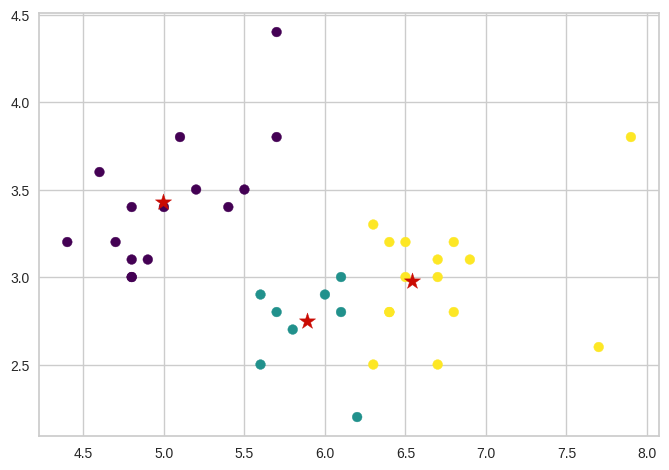

In [47]:
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=lda.predict(X_test), cmap='viridis')
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

## 6. Подбор оптимального числа кластеров для kmeans и визуализиация кластеризации

### Подбор оптимального числа кластеров

In [48]:
from sklearn.cluster import KMeans

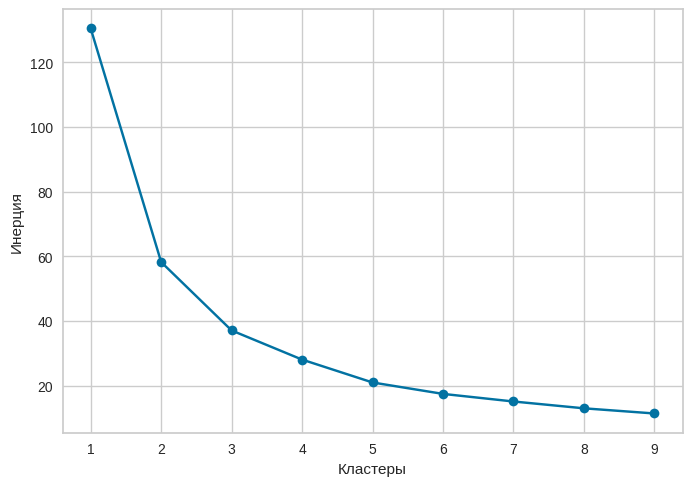

In [49]:
# метод локтя

inertia = []

for i in range(1, 10):
  k_means = KMeans(n_clusters=i, n_init=10, random_state=42)
  k_means.fit(data)
  inertia.append(k_means.inertia_)

plt.plot(range(1, 10), inertia, marker= "o")
plt.xlabel("Кластеры")
plt.ylabel("Инерция")
plt.show()

По графику не совсем понятно, какое значение лучше использовать - 2 или 3.

In [50]:
from sklearn.metrics import silhouette_score

<Axes: xlabel='cluster', ylabel='silhouette'>

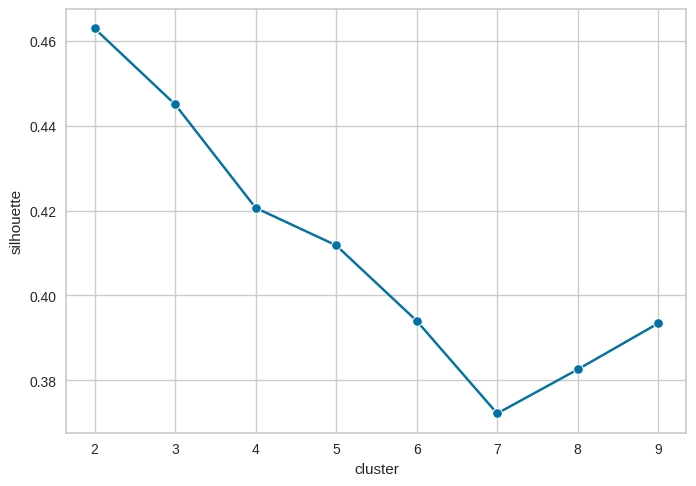

In [51]:
# коэффициент силуэта

silhouette = []
cluster = []

for i in range(2, 10):
  k_means = KMeans(n_clusters=i, n_init=10, random_state=42)
  k_means.fit(data)
  silhouette.append(silhouette_score(data, k_means.predict(data)))
  cluster.append(i)

df_silhouette = pd.DataFrame(dict(zip(silhouette, cluster)).items(),
                             columns=['silhouette', 'cluster'])

sns.lineplot(data=df_silhouette, x="cluster", y="silhouette", marker= "o")

Пик в точке для 2 кластеров.

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer

SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(n_clusters=2, n_init=10, random_state=42))

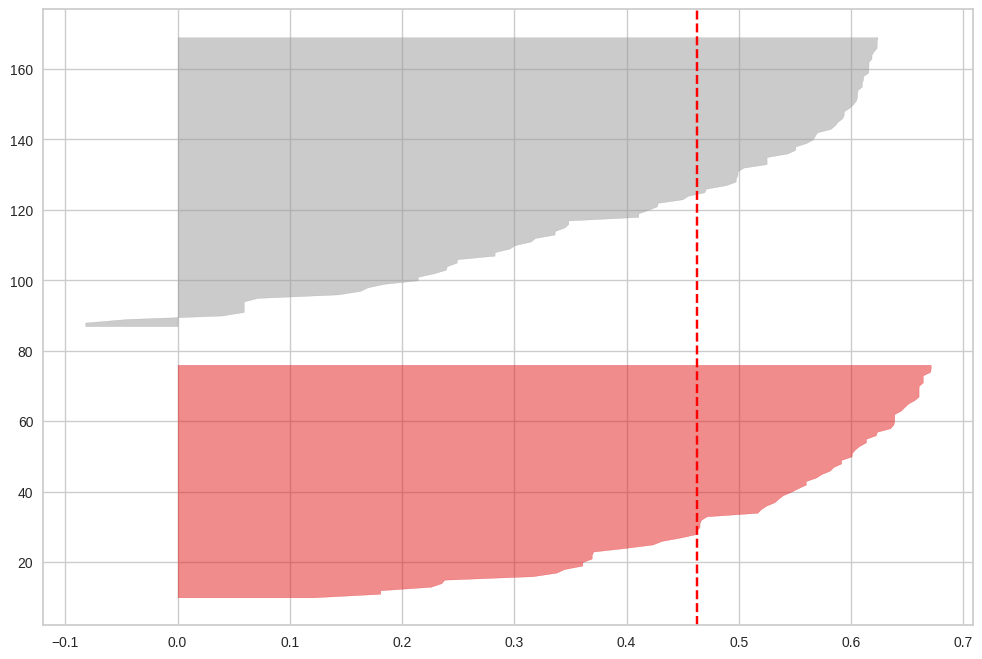

In [53]:
# визуализация силуэтов для 2 кластеров

plt.figure(figsize=(12, 8))
k_means = KMeans(n_clusters=2, n_init=10, random_state=42)
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(data)

SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(n_clusters=3, n_init=10, random_state=42))

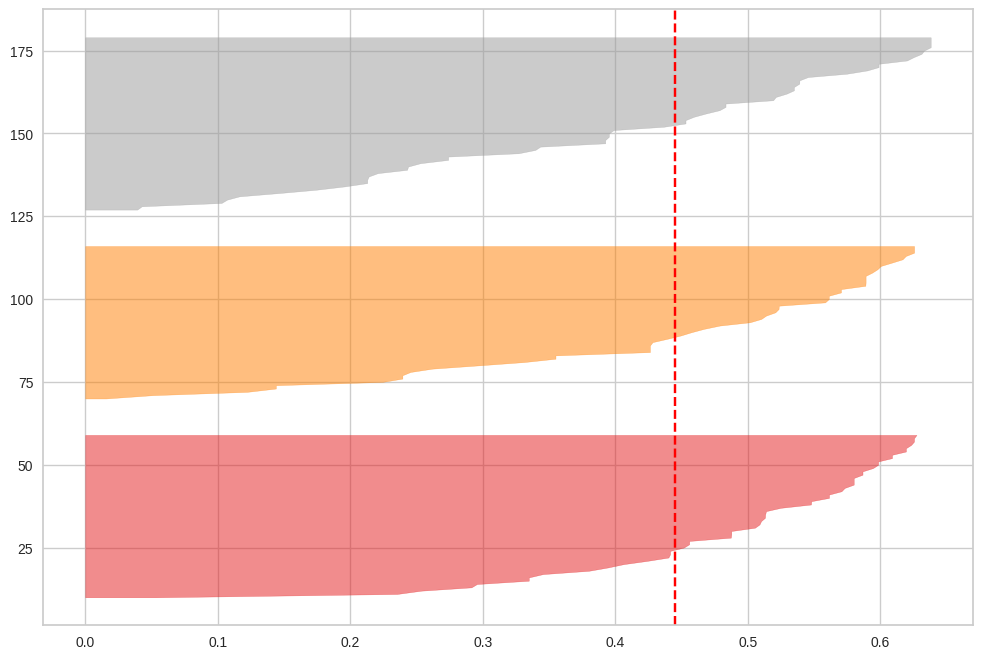

In [54]:
# визуализация силуэтов для 3 кластеров

plt.figure(figsize=(12, 8))
k_means = KMeans(n_clusters=3, n_init=10, random_state=42)
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(data)

Как для 2, так и для 3 кластеров оценки силуэтов сформированных кластеров выше средней оценки силуэта. Графики имеют примерно одинаковую толщину.

В случае 2 кластеров имеются отрицательные значения. Возможно, выборки все таки назначены не тому кластеру. В данном случае (для 2х признаков - 'sepal length (cm)' и 'sepal width (cm)') оптимальное число кластеров - 3.

### Визуализация

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

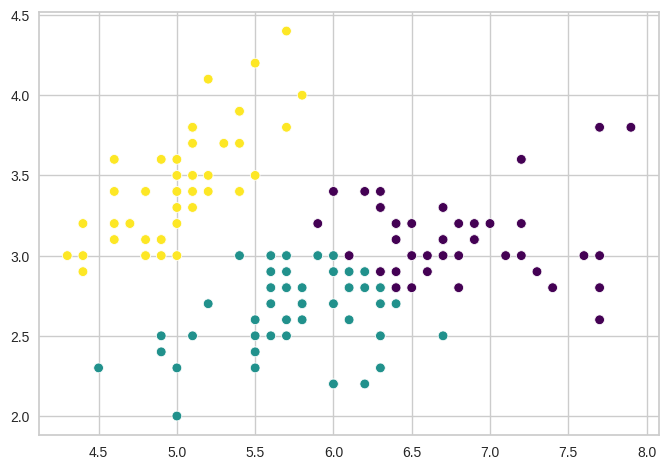

In [57]:
# 3 кластера

kmeans = KMeans(n_clusters=3, random_state=42)
predictions = kmeans.fit_predict(X_scaled)
predictions = kmeans.labels_
data['cluster_3'] = predictions

sns.scatterplot(x=data.values[:, 0], y=data.values[:, 1], c=predictions, cmap='viridis')

### Иерархическая кластеризация

In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [61]:
data = data[['sepal length (cm)', 'sepal width (cm)']]

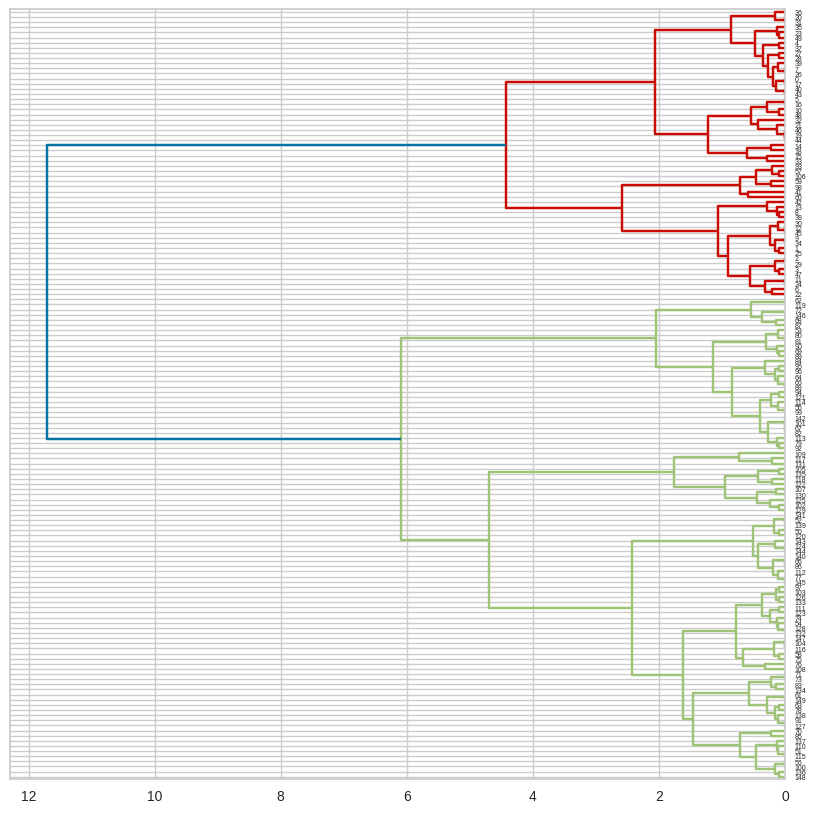

In [72]:
# дендрограмма для иерархической кластеризации

plt.figure(figsize=(10, 10))
linked = linkage(data, 'ward')
dendrogram(Z=linked, orientation='left', labels=data.index,
           distance_sort='descending')
plt.show()

Дендрограмма определила 2 кластера (зеленый и красный)

Еще один вариант - выделить 3 кластера, прочертив линию на расстоянии 6 между кластерами.

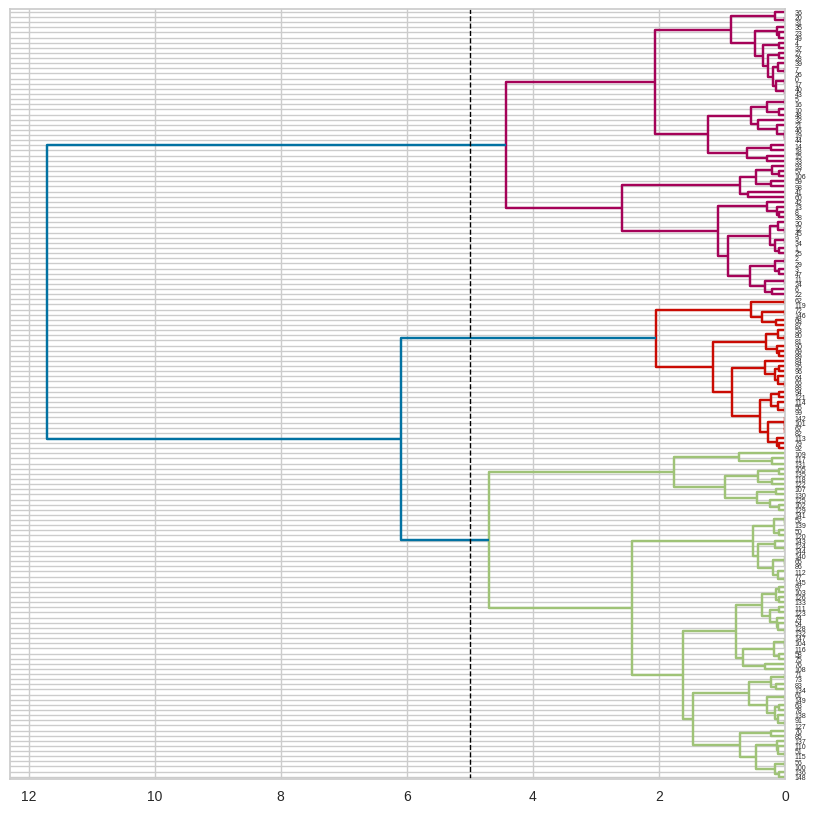

In [73]:
# дендрограмма для иерархической кластеризации

plt.figure(figsize=(10, 10))
linked = linkage(data, 'ward')
dendrogram(Z=linked, orientation='left', labels=data.index,
           distance_sort='descending', color_threshold=5)
plt.axvline(x=5, c='black', lw=1, linestyle='--')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

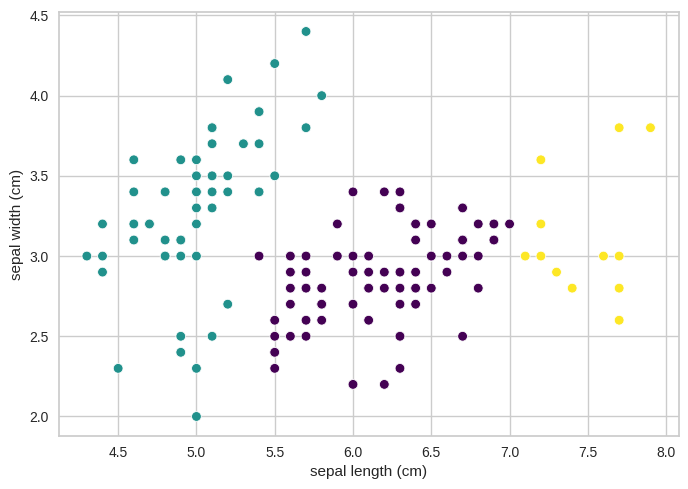

In [25]:
# иерархическая кластеризация

clustering = AgglomerativeClustering(n_clusters=3)
predictions = clustering.fit_predict(data)
predictions = clustering.labels_
data['Clusters_agg'] = predictions

sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], c=predictions, cmap='viridis')

Результат отличается от kmeans.